# Comparative Study of Neural Network and CNNs using the CIFAR-10 Dataset in Keras.


### Part 1: Neural Network

- Step 1: Design, compile, train, and evaluate a simple neural network

- Step 2: Experiment with different activation functions and evaluate their influence on model performance

- Step 3: Adjust and experiment with the number of parameters

- Step 4: Experiment with the depth and width of neural networks

- Step 5: Build an optimized neural network based on observations from previous tasks and analyze the performance.

### Part 2: Convolutional neural network

Use CNN to replace the vanilla neural network from Part 1 and report findings.


In [ ]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Visualize data

In [ ]:
# Load CIFAR Dataset from Keras
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to binary class matrices
num_classes = 10
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Split the full training dataset into validation dataset in 80-20 ratio
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)


x_train.shape, x_val.shape

170498071/170498071 [==============================] - 13s 0us/step


((40000, 32, 32, 3), (10000, 32, 32, 3))

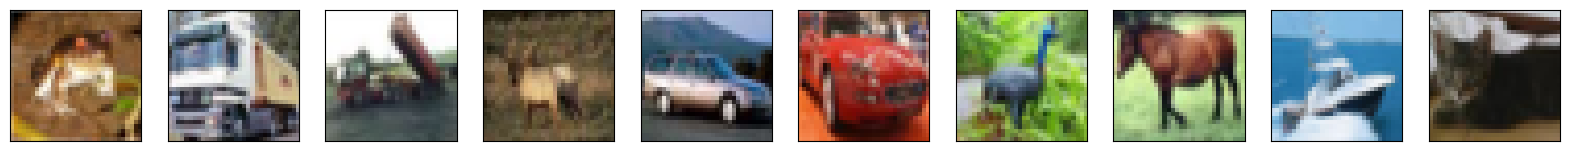

In [ ]:
# Plotting function
def plot_images(X, y, number_of_images=10):
    plt.figure(figsize=(20, 5))
    for i in range(number_of_images):
        plt.subplot(1, number_of_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap=plt.cm.binary)
    plt.show()

# Call the function
plot_images(x_train_full, y_train_full)

## Part 1: Neural Network
### Step 1: Build a simple neural network
First, build a simple neural network for the CIFAR-10 dataset. We will:

Load the CIFAR-10 dataset from Keras. Normalize the data and transform the labels to a categorical format.

Define a simple neural network using three hidden layers using 'relu' activation and a softmax output layer for the 10 classes of the CIFAR-10 dataset.

Compile the model using 'categorical_crossentropy' for the loss function and 'adam' as the optimizer. The metrics will be 'accuracy'.

Train the model using a validation split of 0.2. Train for 10 epochs.
Evaluate the model on the test set and report its accuracy.

### Step 2: Change the activation
Next, we will experiment with different activation functions. Repeat the Step 1 process three times-- once with 'relu' replaced with 'sigmoid', once with 'tanh', and finally with 'gelu'. For each, we will evaluate the model's performance and document any changes.

### Step 3: Change the number of parameters
Now, we will significantly **increase** and **decrease** the number of parameters in the neural network (by an order of magnitude) and compare results.

### Step 4: Change the depth and width
Now, we will alter the structure of the neural network, specifically its depth and width, and compare results while trying to keep the number of parameters fixed.

***Increasing the depth***: We will add more layers to the network to make the model deeper by adding more layers of neurons.

***Increasing the width***: We will also try making the model wider by increasing the number of neurons in the hidden layers.

We are trying to keep the total number of parameters roughly equivalent for each alteration. This means that if we add more layers (increasing depth), we will have to reduce the number of neurons in each layer (decreasing width) to compensate, and vice versa. The aim is to explore the trade-off between network depth and width.

We will evaluate each alteration and compare it to the performance of our original network.

### Step 5: Building an Optimized Neural Network
Based off of our observations observed in steps 1-4, we will aim to build an optimized fully-connected neural network.

# Step 1:


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import keras

# Load Data
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10

y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# Define Network

model = Sequential(name="ReLU_Basic")

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))




# Compile Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# summary
model.summary()


# Train Model

batch_size = 32
epochs = 10
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss, "Test Accuracy: ", test_acc)

Model: "ReLU_Basic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 213898 (835.54 KB)
Trainable params: 213898 (835.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1250/

# Step 2:

## Observations and Analysis:
It looks like ReLU and GeLU perform the best out of any of the other activation functions given the same amount of layers and units in each subsequent layer. Sigmoid being the next best, and TanH the worst.

Moving forward, when creating the optimal fully-connected network, we will test between GeLU and ReLU to see if there's a significant difference in performance when limited to 10 epochs.

In [ ]:
# Change activation function (sigmoid, tanh, gelu)

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10

y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential(name='Sigmoid_Basic')

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))




# Compile Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# summary
model.summary()


# Train Model

batch_size = 32
epochs = 10
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)


(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10

y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential(name='TanH_Basic')

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=num_classes, activation='softmax'))




# Compile Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# summary
model.summary()


# Train Model

batch_size = 32
epochs = 10
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10

y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential(name='GeLU_Basic')

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=64, activation='gelu'))
model.add(Dense(units=128, activation='gelu'))
model.add(Dense(units=64, activation='gelu'))
model.add(Dense(units=num_classes, activation='softmax'))




# Compile Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# summary
model.summary()


# Train Model

batch_size = 32
epochs = 10
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)




Model: "Sigmoid_Basic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                196672    
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 213898 (835.54 KB)
Trainable params: 213898 (835.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
12

 # Step 3:

## Observations and Analysis:
For the same amount of layers, significantly increasing the number of parameters seems to result in better performance than decreasing the number of parameters.

Specifically, the accuracy of the 1024 unit layers resulting in 5256202 total parameters was able to hit 47% accuracy within 10 epochs.

On the other hand, the 16 unit layers resulted in 49882 parameters with only 34% accuracy within 10 epochs.

In [ ]:
# increase number of parameters in the network

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10

y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define Network


model = Sequential(name="ReLU_Increased_Parameters")

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))




# Compile Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# summary
model.summary()


# Train Model

batch_size = 32
epochs = 10
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10

y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Reduce number of parameters in the network

# Define Network

model = Sequential(name="ReLU_Decreased_Parameters")

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))




# Compile Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# summary
model.summary()


# Train Model

batch_size = 32
epochs = 10
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)


Model: "ReLU_Increased_Parameters"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_17 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_18 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_19 (Dense)            (None, 10)                10250     
                                                                 
Total params: 5256202 (20.05 MB)
Trainable params: 5256202 (20.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
E

# Step 4:

## Observations and Analysis:

 Making the model wider instead of deeper seems to allow the network to perform slightly better for the CIFAR data.

Keeping the total amount of parameters for both techniques roughly equivalent, we find that performance of the wider model is slightly better than that of the deeper model.

However, this performance boost seems relatively negligable when limited to only 10 epochs and both approaches result in similar validation accuracy.

In [ ]:
# Increase width, decrease depth

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10

y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define Network

model = Sequential(name="ReLU_Increased_Width")

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=34, activation='relu'))
model.add(Dense(units=34, activation='relu'))
model.add(Dense(units=34, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))




# Compile Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# summary
model.summary()


# Train Model

batch_size = 32
epochs = 10
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)

# Increase depth, decrease width

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10

y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define Network

model = Sequential(name="ReLU_Increased_Depth")

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=28, activation='relu'))


model.add(Dense(units=num_classes, activation='softmax'))




# Compile Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# summary
model.summary()


# Train Model

batch_size = 32
epochs = 10
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)

Model: "ReLU_Increased_Width"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_24 (Dense)            (None, 34)                104482    
                                                                 
 dense_25 (Dense)            (None, 34)                1190      
                                                                 
 dense_26 (Dense)            (None, 34)                1190      
                                                                 
 dense_27 (Dense)            (None, 10)                350       
                                                                 
Total params: 107212 (418.80 KB)
Trainable params: 107212 (418.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 

# Step 5: Building an Optimized Neural Network


Discuss: It seems like for images, having a wider initial neural network results in a better performing model than having a less wide and deep network.

While this seemingly goes against what we understand theoretically, the accuracy shows that a 2-3 layered wide network consistently outperforms that of a "skinnier" deeper network. Although all approaches for a fully-connected neural network seem to flatten out at around 50% accuracy for 10 epochs.

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential(name="Optimized_ReLU")
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))


# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# Train the Model
batch_size = 32
epochs = 10
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)

Model: "Optimized_ReLU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 4726282 (18.03 MB)
Trainable params: 4726282 (18.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1

# Analysis of Step 5, our Optimized Neural Network




# Part 2 CNN

Utilizing the Keras Sequential model, we define a Convolutional Neural Network (CNN) model that is adapted to classify images in the CIFAR-10 dataset.


## Observations and Analysis:

CNN consistently outperforms the neural network we created in part 1. In addition, our models are deeper rather than wider and reach a near 75% validation accuracy.

Between choosing activation functions, out of TanH, Sigmoid, ReLU, and GeLU, we find that from best to worst:

GeLU >= ReLU > TanH > Sigmoid

One thing we noted was that GeLU had a high training accuracy (reaching nearly 94%) but had a lower/similar validation accuracy as ReLU (around 73-75%)

After experimenting around with different kernel sizes, pooling sizes, dropout thresholds and fully-connected layers after flattening, I settled on a kernel size of 3x3 and a pooling size of 2x2 with a dropout of 0.4 after 2 convolutional layers.

For the fully-connected layer after flattening, I only added one Dense layer of size 1024, as adding more layers seemingly added more noise and worsened the accuracy.

I think one thing that could be added to improve this model would be to potentially add a batch mormalization layer in order to re-center and re-scale the input between each convolutional layer and pooling layer.

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.datasets import cifar10
import keras

# Load Data
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

num_classes = 10
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model definition
model = Sequential(name='CNN')
model.add(Conv2D(64, kernel_size=(3,3), input_shape = (32,32,3), activation='gelu'))
model.add(Conv2D(64, kernel_size=(3,3), input_shape= (32,32,3), activation='gelu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, kernel_size=(3,3), input_shape= (32,32,3), activation='gelu'))
model.add(Conv2D(128, kernel_size=(3,3), input_shape= (32,32,3), activation='gelu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(units=1024, activation='gelu'))
model.add(Dense(units=num_classes, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary
model.summary()

# train the model
batch_size = 32
epochs = 10
history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.2)


# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_33 (Conv2D)          (None, 10, 10, 128)       147584    
                                                               